# Model PCEX

Model PCEX is introduced in chapter 4 of Godley & Lavoie (2007) "Monetary Economics: An Integrated Approach to Credit, Money, Income, Production and Wealth". In its setup, the model has the same transactions and balance sheet as Model PC but features expectations on disposable income and wealth. 

## Model Overview

### Behavioral Equations

Unlike model [PC](GL06PC.ipynb), model PCEX is built with expectations. Specifically, the household forms expectations of its disposable income $YD^e$ and its expected wealth $V^e$. With these two variables, the remaining equations of the model are almost identical to model PC.

1. National Income
$$
Y(t) = C(t) + G(t)
$$
2. Disposable income is national income and interest earnings minus taxes
$$
YD(t) = Y(t) - T(t) + r(t-1)\cdot B_h(t-1)
$$
3. Taxes are a fixed share of income
$$
T(t) = \Theta \cdot \left(Y(t) + r(t-1)\cdot B_h(t-1)\right)
$$
4. Wealth increases by savings
$$
V(t) = V(t-1) + (YD(t) - C(t))
$$
5. Consumption is partially out of disposable income and wealth, **but now based on expected disposable income**
$$
C(t) = \alpha_1\cdot YD^e(t) + \alpha_2\cdot V(t-1)
$$
6. The share of bills in wealth depends on **expected wealth and expected disposable income**
$$
\frac{B_d(t)}{V^e(t)}=\lambda_0 + \lambda_1\cdot r(t) - \lambda_2\cdot\left(\frac{YD^e(t)}{V^e(t)}\right)
$$
7. The share of cash in wealth (6A)
$$
\frac{H_d(t)}{V^e(t)}=(1-\lambda_0) - \lambda_1\cdot r(t) + \lambda_2\cdot\left(\frac{YD^e(t)}{V^e(t)}\right)
$$
8. Household cash demand can also be described by the difference between **expected wealth** and **demand for bills**
$$
H_d(t) = V^e(t) - B_h(t)
$$
8. **expected wealth** depends on **expected disposable income**
$$
V^e(t) = V(t-1) + (YD^e(t) - C(t))
$$
9. The household's realized cash holdings then depend on the realisation of household wealth
$$
H_h(t) = V(t) - B_h(t)
$$
10. Where we assume now that the household's demand for bills is met.
$$
B_h(t) = B_d(t)
$$
11. The change in the stock of outstanding government bills (also known as the government's budget constraint). The first part represents government outlays (direct purchases and interest payments) while the second represents government revenues (taxes and central bank profits)
$$
\begin{align}
\Delta B_s(t) &= B_s(t) - B_s(t-1)\\
&= (G(t) + r(t-1)\cdot B_s(t-1)) - (T(t) + r(t-1)\cdot B_{CB}(t-1))
\end{align}
$$
12. The change in money circulating 
$$
\Delta H_s(t) = H_s(t) - H_s(t-1) = \Delta B_{CB}
$$
13. Bills held by the central bank, the central bank purchases all of the bills issued by the government that the households are not willing to buy given the current interest rate. Combined with {eq}`gl06_pc_eq409_moneyIssuance` it implies the CB provides cash money on demand. Therefore, _the amount of cash in the system is endogeneous and demand-led_ while _the rate on bills is exogenous_.
$$
B_{CB}(t) = B_s(t) - B_h(t)
$$
13. The interest rate is fixed
$$
r(t) = \bar{r}
$$

With the redundant equation being
$$
H_s(t) = H_h(t)
$$

**Now we must still define how the expected disposable income is set**, as with model [SIMEX](SIMEX.ipynb), we suppose that it is a simple extrapolation from prior levels (which is self-consistent in a steady state since the economy is not growing here). 
$$
YD^e(t) = YD(t-1)
$$

Note that in Godley & Lavoie this is equivalent to _Model PCEX1_, while _Model PCEX_ actually just assumes a random multiplicative term on the $YD$ determined by model PC. I do not here model this part, as it is only used as a demonstration in the book. 


## Implementation in MacroStat

Transposing these eleven equations to the `MacroStat` framework, we consider that there are:

1. Three parameters (fixed constants): $\alpha_1$, $\alpha_2$, and $\theta$ (see [Parameters](GL06PCEX/parameters.rst))
2. Two scenario variables : $G_d(t)$ and $W(t)$ (see [Scenarios](GL06PCEX/scenarios.rst))
3. The remaining tracked series are variables (see [Variables](GL06PCEX/variables.rst))

## Model Dynamics

### Preparatory Steps

In [1]:
%load_ext autoreload
%autoreload 2

import importlib
import logging
import sys

# Import the necessary libraries for plotting
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter

# Import the MacroStat get_model function
from macrostat.models import get_model

# We show the logging output in the notebook
importlib.reload(logging)
logging.basicConfig(stream=sys.stdout, level=logging.INFO)

### Running the Simulation

First, we can run the model without any shocks to see the convergence to the steady state.

In [2]:
GL06PCEXClass = get_model("GL06PCEX")
model = GL06PCEXClass()
model.simulate()
output = model.variables.to_pandas()

Here we can also check that the variables are healthy, which means that the redundant equations hold and that all the assets and liabilities are positive. For model PC, the redundant equation is that the household money stock equals the central bank money stock. 

In [3]:
model.variables.check_health(tolerance=1e-5)

True

An overview of the first 10 steps of the model

In [4]:
df=model.variables.to_pandas()
df.head(10).T

,time,0,1,2,3,4,5,6,7,8,9
ConsumptionHousehold,Household,0.0,0.0,0.000,16.000000,28.799999,39.280003,47.856003,54.874001,60.617043,65.316742
ConsumptionGovernment,Government,0.0,0.0,20.000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
NationalIncome,Macroeconomy,0.0,0.0,20.000,36.000000,48.799999,59.280003,67.856003,74.874001,80.617043,85.316742
InterestEarnedOnBillsHousehold,Household,0.0,0.0,0.000,0.000000,0.300000,0.540000,0.736500,0.897300,1.028887,1.136569
CentralBankProfits,CentralBank,0.0,0.0,0.000,0.400000,0.420000,0.442000,0.459900,0.474550,0.486539,0.496349
Taxes,Household,0.0,0.0,4.000,7.200000,9.820000,11.964001,13.718501,15.154261,16.329185,17.290663
HouseholdMoneyStock,Household,0.0,0.0,16.000,16.799999,17.680004,18.396004,18.981991,19.461540,19.853958,20.175072
CentralBankMoneyStock,CentralBank,0.0,0.0,16.000,16.800003,17.680002,18.396004,18.981995,19.461544,19.853966,20.175095
HouseholdBillStock,Household,0.0,0.0,0.000,12.000000,21.599998,29.459995,35.892002,41.155495,45.462776,48.987556
GovernmentBillStock,Government,0.0,0.0,16.000,28.800001,39.279999,47.855999,54.873997,60.617039,65.316742,69.162651


### Convergence to the Steady State

The steady state for Model PCEX is equivalent to model PC, it just has delays in reathing the steady state. In {cite:t}`GodleyLavoie2006MonetaryEconomicsIntegrated` models are initialized with almost all of the variables set to zero. For model PCEX the only non-zero item is that in period 0 the government demand is 20, i.e. the government creates 20 monetary units of demand.

To aid in our graphing, we can calculate the steady state solutions for the variables following the derivations in Section 4.5 of Godley and Lavoie {cite:t}`GodleyLavoie2006MonetaryEconomicsIntegrated`:

$$
\begin{align}
G^\star(t) &= G(t)\\
r^\star(t) &= r(t)\\
\alpha_3 &= \frac{1-\alpha_1}{\alpha_2}\\
YD^\star(t) = YD^{e\star}(t) &= \frac{G^\star(t)}{\frac{\theta}{1-\theta} - r^\star(t)\cdot\left(\left(\lambda_0 + \lambda_1 r^\star(t) \right)\alpha_3 - \lambda_2\right)}\\
C^\star(t) &= YD^\star(t)\\
Y^\star(t) &= C^\star(t) + G^\star(t)\\
V^\star(t) = V^{e\star}(t) &= \alpha_3 YD^\star(t)\\
B_d^\star(t) = B_h^\star(t) &= \left(\left(\lambda_0 + \lambda_1 r^\star(t) \right)\alpha_3 - \lambda_2\right)\cdot YD^\star(t)\\
T^\star(t) &= \theta\cdot \left(Y^\star(t) + r^\star(t) B_h^\star(t)\right)\\
H_h^\star(t) &= V^{e\star}(t) - B_h^\star(t)\\
B_s^\star(t) &= \frac{r^\star(t) B_{CB}^\star(t) + T^\star(t) - G^\star(t)}{r^\star(t)}\\
B_{CB}^\star(t) &= B_s^\star(t) - B_h^\star(t)\\
H_s^\star(t) &= H_{s}(t-1) + (B_{CB}(t) - B_{CB}(t-1))
\end{align}
$$

In macrostat, this solution has been implemented in the `compute_theoretical_steady_state()` function. We compute this now for `scenario=0`, which is the case without any shocks and constant government demand $G$ and interest rates $r$. 

In [5]:
model.compute_theoretical_steady_state(scenario=0)
steadystate = model.variables.to_pandas()

INFO:root:Computing theoretical steady state. Scenario: 0


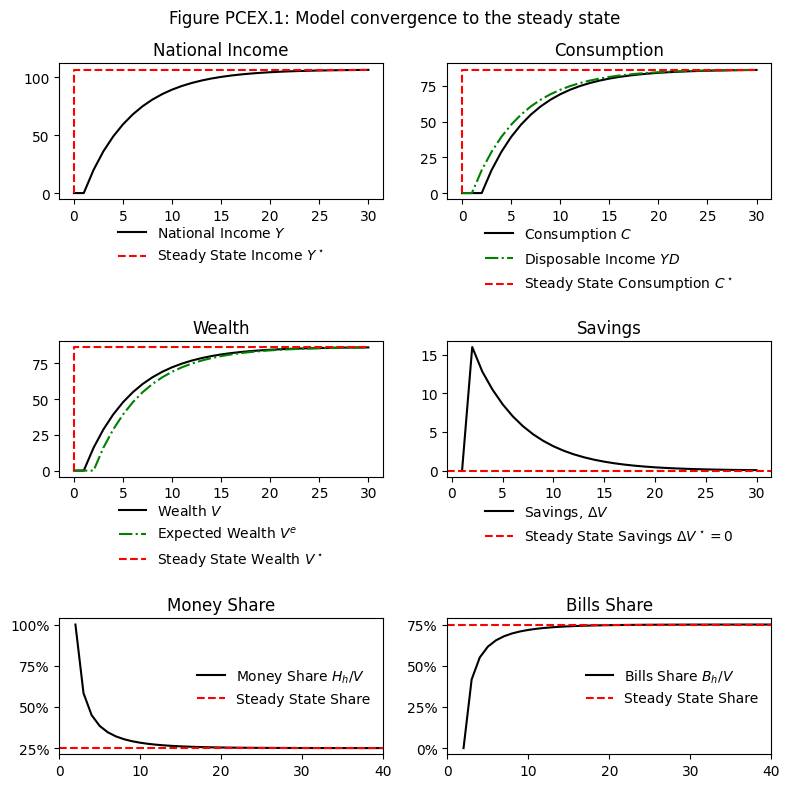

In [6]:
dfo = output.loc[:30]
dfs = steadystate.loc[:30]

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(8, 8))

# National Income and Consumption
axs[0,0].plot(dfo.index, dfo['NationalIncome'], color='k', label=r'National Income $Y$')
axs[0,0].step(x=dfs.index,y=dfs["NationalIncome"], color='r', linestyle='--', label=r'Steady State Income $Y^\star$')
axs[0,0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=False)
axs[0,0].set_title('National Income')
axs[0,1].plot(dfo.index, dfo['ConsumptionHousehold'], color='k', label=r'Consumption $C$')
axs[0,1].plot(dfo.index, dfo['DisposableIncome'], color='g', linestyle='-.', label=r'Disposable Income $YD$')
axs[0,1].step(x=dfs.index,y=dfs["ConsumptionHousehold"], color='r', linestyle='--', label=r'Steady State Consumption $C^\star$')
axs[0,1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=False)
axs[0,1].set_title('Consumption')

# Wealth and Savings
axs[1,0].plot(dfo.index, dfo['Wealth'], color='k', label=r'Wealth $V$')
axs[1,0].plot(dfo.index, dfo['ExpectedWealth'], color='g', linestyle='-.', label=r'Expected Wealth $V^e$')
axs[1,0].step(x=dfs.index,y=dfs["Wealth"], color='r', linestyle='--', label=r'Steady State Wealth $V^\star$')
axs[1,0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=False)
axs[1,0].set_title('Wealth')
axs[1,1].plot(dfo.index, dfo['Wealth'].diff(), color='k', label=r'Savings, $\Delta V$')
axs[1,1].axhline(y=0, color='r', linestyle='--', label=r'Steady State Savings $\Delta V^\star=0$')
axs[1,1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=False)
axs[1,1].set_title('Savings')

# Money Share and Bills Share
share_bills = steadystate['HouseholdBillStock'] / steadystate['Wealth']
axs[2,0].plot(output.index, output['HouseholdMoneyStock'] / output['Wealth'], color='k', linestyle='-', label='Money Share $H_h/V$')
axs[2,0].step(x=share_bills.index,y=1-share_bills, color='r', linestyle='--', label='Steady State Share')
axs[2,0].legend(loc='center right', frameon=False)
axs[2,0].set_xlim(0,40)
axs[2,0].set_title('Money Share')
axs[2,0].yaxis.set_major_formatter(PercentFormatter(1))

# Right panel - Bills share
axs[2,1].plot(output.index, output['HouseholdBillStock'] / output['Wealth'], color='k', linestyle='-', label='Bills Share $B_h/V$')
axs[2,1].step(x=share_bills.index,y=share_bills, color='r', linestyle='--', label='Steady State Share')
axs[2,1].legend(loc='center right', frameon=False)
axs[2,1].set_xlim(0,40)
axs[2,1].set_title('Bills Share')
axs[2,1].yaxis.set_major_formatter(PercentFormatter(1))


fig.suptitle('Figure PCEX.1: Model convergence to the steady state')
plt.tight_layout()
plt.show()


### Perturbation 1: An increase of 100 points in the rate of interest on bills ($r$)

Following the convergence to the steady state, we can study the effects of an increase in the rate on bills by 100bps (Figures 4.3 and 4.4 in {cite:t}`GodleyLavoie2006MonetaryEconomicsIntegrated`).

`MacroStat` is set up to easily handle these scenarios. Much like in prior models, we simply define a new scenario `IncreaseInterestRate` and set the new rate to be 100 points higher $r=0.025+0.01$

In [7]:
model.parameters["scenario_trigger"] = 60
model.scenarios.add_scenario(
    name="IncreaseInterestRate",
    timeseries={"InterestRate":0.025 + 0.01}
)
model.simulate(scenario="IncreaseInterestRate")
output_rate_increase = model.variables.to_pandas()

We then need to compute the new steady state values for the variables

In [8]:
model.compute_theoretical_steady_state(scenario="IncreaseInterestRate")
steadystate_rate_increase = model.variables.to_pandas()

INFO:root:Computing theoretical steady state. Scenario: 1


Now we can see how the model reacts to the shock.

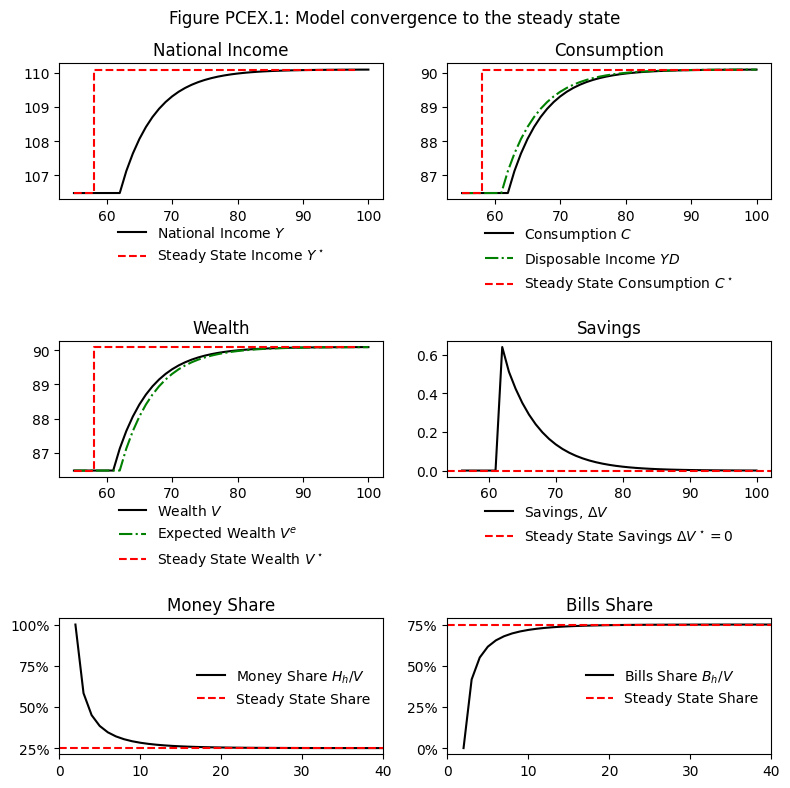

In [9]:
dfo = output_rate_increase.loc[55:]
dfs = steadystate_rate_increase.loc[55:]

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(8, 8))

# National Income and Consumption
axs[0,0].plot(dfo.index, dfo['NationalIncome'], color='k', label=r'National Income $Y$')
axs[0,0].step(x=dfs.index,y=dfs["NationalIncome"], color='r', linestyle='--', label=r'Steady State Income $Y^\star$')
axs[0,0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=False)
axs[0,0].set_title('National Income')
axs[0,1].plot(dfo.index, dfo['ConsumptionHousehold'], color='k', label=r'Consumption $C$')
axs[0,1].plot(dfo.index, dfo['DisposableIncome'], color='g', linestyle='-.', label=r'Disposable Income $YD$')
axs[0,1].step(x=dfs.index,y=dfs["ConsumptionHousehold"], color='r', linestyle='--', label=r'Steady State Consumption $C^\star$')
axs[0,1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=False)
axs[0,1].set_title('Consumption')

# Wealth and Savings
axs[1,0].plot(dfo.index, dfo['Wealth'], color='k', label=r'Wealth $V$')
axs[1,0].plot(dfo.index, dfo['ExpectedWealth'], color='g', linestyle='-.', label=r'Expected Wealth $V^e$')
axs[1,0].step(x=dfs.index,y=dfs["Wealth"], color='r', linestyle='--', label=r'Steady State Wealth $V^\star$')
axs[1,0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=False)
axs[1,0].set_title('Wealth')
axs[1,1].plot(dfo.index, dfo['Wealth'].diff(), color='k', label=r'Savings, $\Delta V$')
axs[1,1].axhline(y=0, color='r', linestyle='--', label=r'Steady State Savings $\Delta V^\star=0$')
axs[1,1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=False)
axs[1,1].set_title('Savings')

# Money Share and Bills Share
share_bills = steadystate['HouseholdBillStock'] / steadystate['Wealth']
axs[2,0].plot(output.index, output['HouseholdMoneyStock'] / output['Wealth'], color='k', linestyle='-', label='Money Share $H_h/V$')
axs[2,0].step(x=share_bills.index,y=1-share_bills, color='r', linestyle='--', label='Steady State Share')
axs[2,0].legend(loc='center right', frameon=False)
axs[2,0].set_xlim(0,40)
axs[2,0].set_title('Money Share')
axs[2,0].yaxis.set_major_formatter(PercentFormatter(1))

# Right panel - Bills share
axs[2,1].plot(output.index, output['HouseholdBillStock'] / output['Wealth'], color='k', linestyle='-', label='Bills Share $B_h/V$')
axs[2,1].step(x=share_bills.index,y=share_bills, color='r', linestyle='--', label='Steady State Share')
axs[2,1].legend(loc='center right', frameon=False)
axs[2,1].set_xlim(0,40)
axs[2,1].set_title('Bills Share')
axs[2,1].yaxis.set_major_formatter(PercentFormatter(1))


fig.suptitle('Figure PCEX.1: Model convergence to the steady state')
plt.tight_layout()
plt.show()


### Perturbation 2: An increase in the propensity to consume out of income ($\alpha_1$)

Following the convergence to the steady state, we can study the effects of an increase of the household sector's propensity to consume out of income.

`MacroStat` is set up to easily handle time-dependent changes in the values of parameters (useful for scenarios and calibration). It specifically supports two types of paramer-shocks: multiplicative and additive. Thus, if `pname` is the name of the parameter, it checks for the existence of `pname_multiply` and `pname_add` in the scenarios to edit them. 

Therefore, let us add this kind of scenario can easily be implemented in the `MacroStat` version by adding a scenario:
1. In the file `Scenarios` specific to `GL06PCEX` (i.e. `macrostat/models/GL06PCEX/scenarios.py`) I added the `PropensityToConsumeIncome_add` default_value, and set it to zero. 
2. Noting that we have convergence to the steady state at period 60, let us set this as the scenario trigger
3. We then need a new timeseries for the scenario, where we have `PropensityToConsumeIncome_add=0.01`

In [10]:
model.parameters["scenario_trigger"] = 60
model.scenarios.add_scenario(
    name="PropensityToConsumeIncomeIncrease",
    timeseries={"PropensityToConsumeIncome_add":0.01}
)
model.simulate(scenario="PropensityToConsumeIncomeIncrease")
output_cons_propensity_increase = model.variables.to_pandas()

We then need to compute the new steady state values for the variables

In [11]:
model.compute_theoretical_steady_state(scenario="PropensityToConsumeIncomeIncrease")
steadystate_cons_propensity_increase = model.variables.to_pandas()

INFO:root:Computing theoretical steady state. Scenario: 2


Now we can see how the model reacts to the shock.

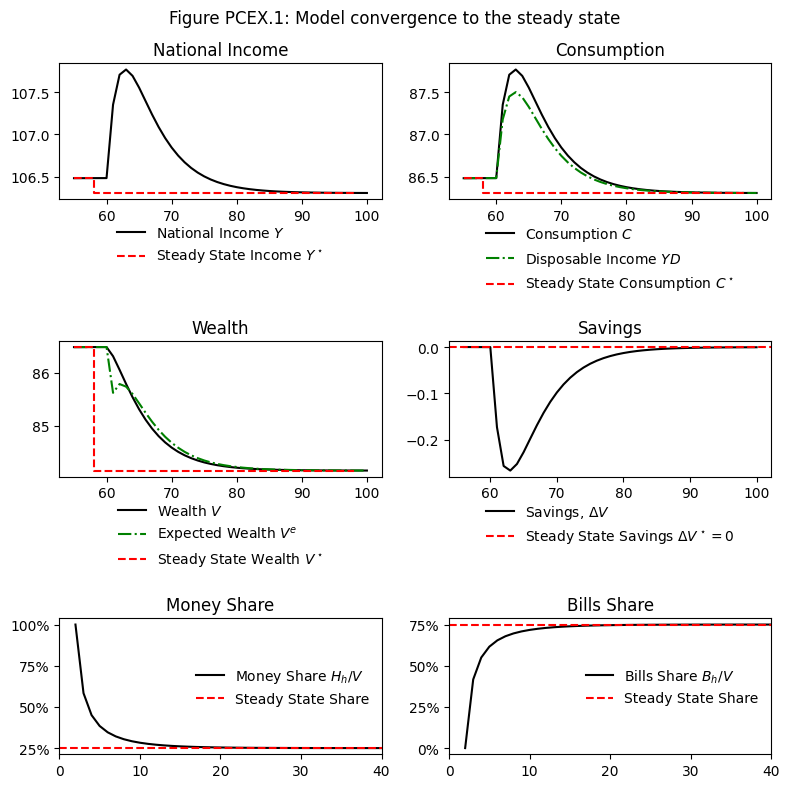

In [12]:
dfo = output_cons_propensity_increase.loc[55:]
dfs = steadystate_cons_propensity_increase.loc[55:]

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(8, 8))

# National Income and Consumption
axs[0,0].plot(dfo.index, dfo['NationalIncome'], color='k', label=r'National Income $Y$')
axs[0,0].step(x=dfs.index,y=dfs["NationalIncome"], color='r', linestyle='--', label=r'Steady State Income $Y^\star$')
axs[0,0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=False)
axs[0,0].set_title('National Income')
axs[0,1].plot(dfo.index, dfo['ConsumptionHousehold'], color='k', label=r'Consumption $C$')
axs[0,1].plot(dfo.index, dfo['DisposableIncome'], color='g', linestyle='-.', label=r'Disposable Income $YD$')
axs[0,1].step(x=dfs.index,y=dfs["ConsumptionHousehold"], color='r', linestyle='--', label=r'Steady State Consumption $C^\star$')
axs[0,1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=False)
axs[0,1].set_title('Consumption')

# Wealth and Savings
axs[1,0].plot(dfo.index, dfo['Wealth'], color='k', label=r'Wealth $V$')
axs[1,0].plot(dfo.index, dfo['ExpectedWealth'], color='g', linestyle='-.', label=r'Expected Wealth $V^e$')
axs[1,0].step(x=dfs.index,y=dfs["Wealth"], color='r', linestyle='--', label=r'Steady State Wealth $V^\star$')
axs[1,0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=False)
axs[1,0].set_title('Wealth')
axs[1,1].plot(dfo.index, dfo['Wealth'].diff(), color='k', label=r'Savings, $\Delta V$')
axs[1,1].axhline(y=0, color='r', linestyle='--', label=r'Steady State Savings $\Delta V^\star=0$')
axs[1,1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=False)
axs[1,1].set_title('Savings')

# Money Share and Bills Share
share_bills = steadystate['HouseholdBillStock'] / steadystate['Wealth']
axs[2,0].plot(output.index, output['HouseholdMoneyStock'] / output['Wealth'], color='k', linestyle='-', label='Money Share $H_h/V$')
axs[2,0].step(x=share_bills.index,y=1-share_bills, color='r', linestyle='--', label='Steady State Share')
axs[2,0].legend(loc='center right', frameon=False)
axs[2,0].set_xlim(0,40)
axs[2,0].set_title('Money Share')
axs[2,0].yaxis.set_major_formatter(PercentFormatter(1))

# Right panel - Bills share
axs[2,1].plot(output.index, output['HouseholdBillStock'] / output['Wealth'], color='k', linestyle='-', label='Bills Share $B_h/V$')
axs[2,1].step(x=share_bills.index,y=share_bills, color='r', linestyle='--', label='Steady State Share')
axs[2,1].legend(loc='center right', frameon=False)
axs[2,1].set_xlim(0,40)
axs[2,1].set_title('Bills Share')
axs[2,1].yaxis.set_major_formatter(PercentFormatter(1))


fig.suptitle('Figure PCEX.1: Model convergence to the steady state')
plt.tight_layout()
plt.show()
